<a href="https://colab.research.google.com/github/HarrxYz/Machine-Learning/blob/main/Recomendationsystem/Recomendation_Sytem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
ratings = pd.read_csv('https://storage.googleapis.com/bogorism/dataPlaces/Rating.csv')
Place = pd.read_csv('https://storage.googleapis.com/bogorism/dataPlaces/Place.csv')

In [ ]:
n_Place = ratings.Place_Id.nunique()
n_Users = ratings.User_Id.nunique()

print(n_Place)
print(n_Users)

120
300


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ratings, test_size=0.2)

In [ ]:
print(train.shape)
print(test.shape)

(2214, 3)
(554, 3)


In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Embedding, Dot, Flatten
EMBEDDING_DIM = 4

Place_input = Input(shape=[1])
user_input = Input(shape=[1])

Place_embedding = Embedding(n_Place+1, EMBEDDING_DIM)(Place_input)
user_embedding = Embedding(n_Users+1, EMBEDDING_DIM)(user_input)


place_flat = Flatten()(Place_embedding)
user_flat = Flatten()(user_embedding)

output = Dot(1)([place_flat, user_flat])

model = Model([Place_input, user_input], [output])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 4)         484         ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 4)         1204        ['input_2[0][0]']                
                                                                                              

In [ ]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer='adam', loss='mse')

In [ ]:
history = model.fit(x=[train.Place_Id, train.User_Id], y=train.Place_Ratings,
                    validation_data=([test.Place_Id, test.User_Id], test.Place_Ratings),
                    batch_size=128,
                    epochs=300)

Epoch 1/300
18/18 [==============================] - 2s 41ms/step - loss: 11.0955 - val_loss: 11.2717
Epoch 2/300
18/18 [==============================] - 0s 10ms/step - loss: 11.0931 - val_loss: 11.2714
Epoch 3/300
18/18 [==============================] - 0s 8ms/step - loss: 11.0907 - val_loss: 11.2710
Epoch 4/300
18/18 [==============================] - 0s 10ms/step - loss: 11.0876 - val_loss: 11.2702
Epoch 5/300
18/18 [==============================] - 0s 7ms/step - loss: 11.0832 - val_loss: 11.2685
Epoch 6/300
18/18 [==============================] - 0s 9ms/step - loss: 11.0768 - val_loss: 11.2654
Epoch 7/300
18/18 [==============================] - 0s 11ms/step - loss: 11.0674 - val_loss: 11.2597
Epoch 8/300
18/18 [==============================] - 0s 9ms/step - loss: 11.0538 - val_loss: 11.2505
Epoch 9/300
18/18 [==============================] - 0s 7ms/step - loss: 11.0346 - val_loss: 11.2363
Epoch 10/300
18/18 [==============================] - 0s 10ms/step - loss: 11.0082 - va

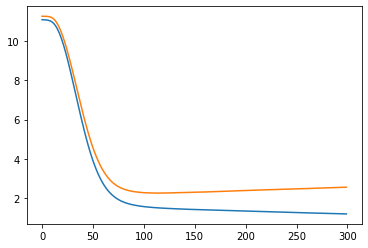

In [ ]:
import matplotlib.pyplot as plt

losses = pd.DataFrame(history.history)
plt.plot(losses)

In [ ]:
model.evaluate([test.Place_Id, test.User_Id], test.Place_Ratings)

18/18 [==============================] - 0s 2ms/step - loss: 2.5546


2.5545711517333984

In [ ]:
model.save('model.h5')

In [ ]:
!pip install tensorflowjs
!tensorflowjs_converter --input_format=keras ./model.h5 ./tfjs_model

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from zipfile import ZipFile
import os

with ZipFile('tfjs_model.zip', 'w') as z:
  for filename in os.listdir('tfjs_model'): 
    filepath = os.path.join('tfjs_model', filename)
    z.write(filepath)

In [ ]:
import pickle
pickle.dump(model,open("model.pkl", 'wb'))

INFO:tensorflow:Assets written to: ram://76e5319c-27f5-415d-b2ca-bef2221af875/assets


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def get_recommendations(User_Id, Place, model):
  places = Place.copy()
  user_ids = np.array([User_Id] * len(places))
  results = model([places.Place_Id.values, user_ids]).numpy().reshape(-1)

  places['predicted_rating'] = pd.Series(results)
  places = places.sort_values('predicted_rating', ascending=False)

  print(f'Recommendations for user {User_Id}')
  return places

get_recommendations(2, Place, model)

Recommendations for user 2


,Place_Id,Place_Name,Description,Category,City,Price,Rating,Lat,Long,predicted_rating
5,6,Jungle Fest,theme park with a lifestyle concept that offer...,Amusement Park,Bogor,75000,4.5,-6.641244,106.786651,4.801045
97,98,DeBoekit Cafee,modern cafe with a beautiful feel. One of the ...,Foods,Bogor,270000,4.3,-6.550417,106.890633,4.656307
1,2,Curug Love,This waterfall has a water flow that resembles...,Natural,Bogor,10000,4.6,-7.214250,107.030780,4.479185
40,41,Curug Ciputri,Curug Ciputri has a height of about 30 meters ...,Natural,Bogor,20000,4.4,-6.683513,106.706002,4.429435
115,116,Kopi Daong,drinking coffee under the beautiful pine trees,Foods,Bogor,21000,4.4,-6.724691,106.875597,4.419535
...,...,...,...,...,...,...,...,...,...,...
83,84,Batik Bogor Tradisiku,The motives vary ranging from rain cleaver dee...,Shopping,Bogor,0,4.6,-6.573079,106.799618,2.073937
41,42,Curug Barong,The height of Curug Barong is only about 7 met...,Natural,Bogor,25000,4.4,-6.594653,106.954402,2.049234
18,19,Jungle Land Adventure Theme,a forest-themed place that provides rides for ...,Amusement Park,Bogor,185000,4.6,-6.572278,106.894679,2.021379
76,77,Jumper Indoor Trampoline Park,play and exercise on a trampoline. learn somer...,Amusement Park,Bogor,70000,4.4,-6.570582,106.767316,1.941787


In [ ]:
new_ratings

{'Place_Id': 1, 'Place_Ratings': 5, 'User_Id': 301}